<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/MLA3_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 3
Jacob Vallery <br>CS430-ON <br>MachineLearning in the Cloud

#Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for Specific Models

In [2]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

#Imports for Splitting Data and Building Pipeline

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


#Imports for Performance Measures

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Confusion Matrix Function

In [36]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 1

#SVC Classification - Acquire Data

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

#Statistical and Visual Exploration

In [5]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
df['forgery'].value_counts()

,count
forgery,
0,762
1,610


<Figure size 1000x500 with 0 Axes>

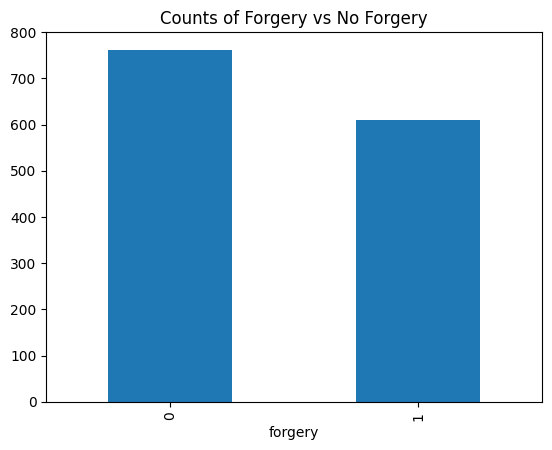

<Figure size 1000x500 with 0 Axes>

In [10]:
forgery_count = df['forgery'].value_counts()
forgery_count.plot(kind='bar')
plt.title('Counts of Forgery vs No Forgery')
plt.figure(figsize=(10, 5))

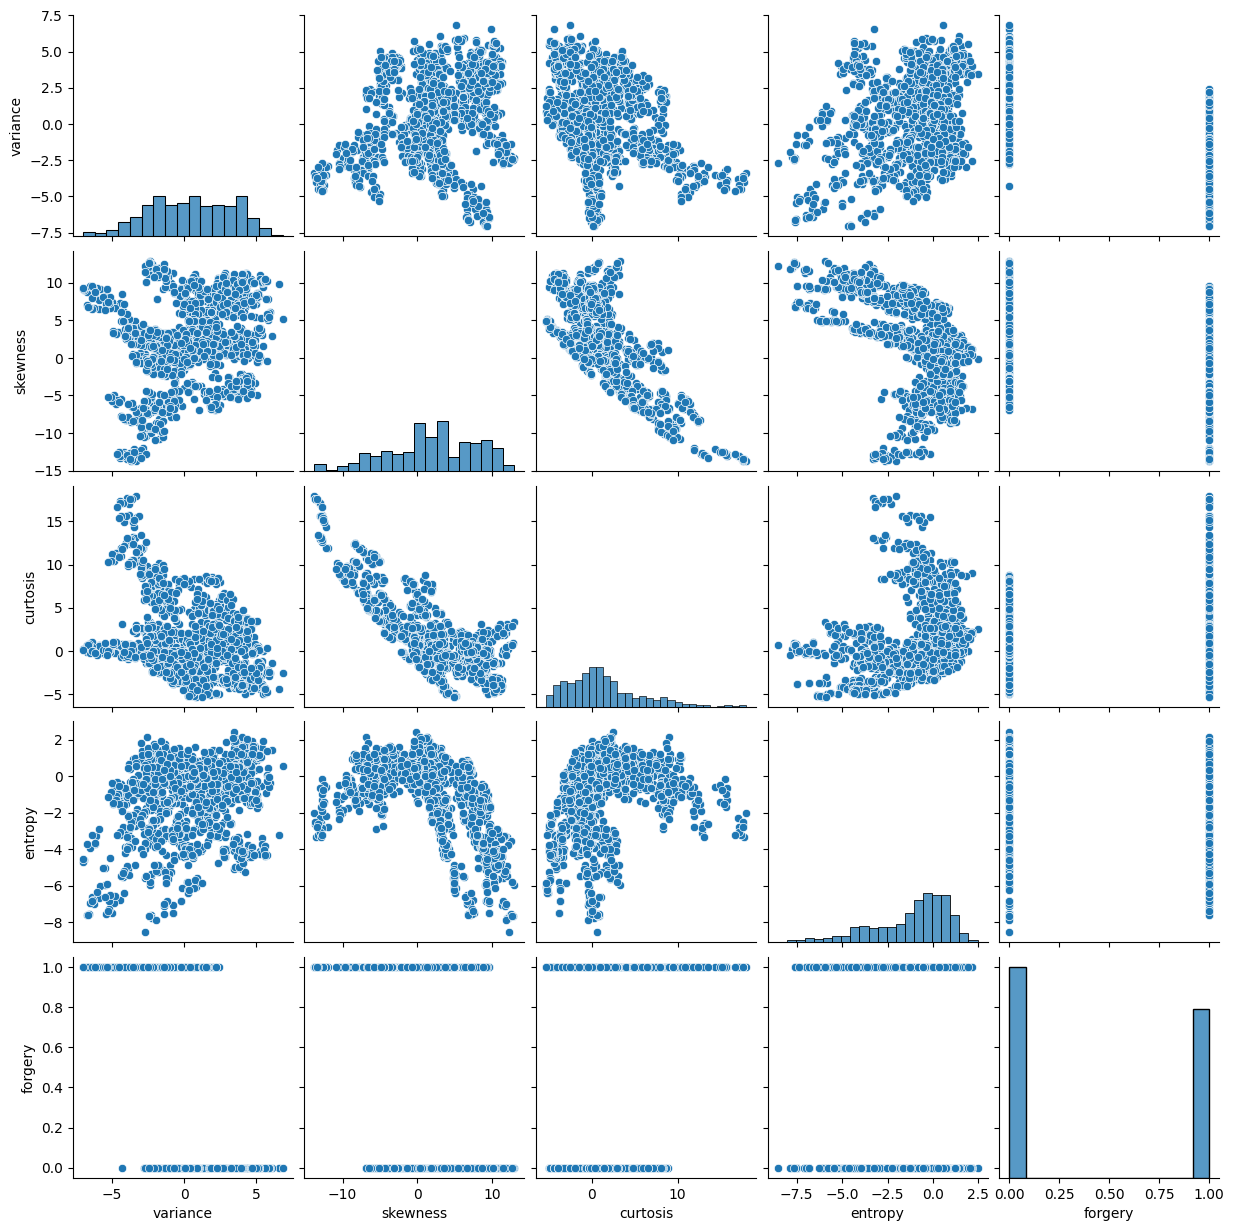

In [11]:
sns.pairplot(df)
plt.show()

In a Markdown comment - write up any interesting patterns you see from the pairplot

#Splitting Data into Train/Test

In [15]:
df.head()


,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [16]:
X = df.drop(columns=['forgery'])
y = df['forgery']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#Building the Pipeline

In [25]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [24]:

y.head()

,forgery
0,0
1,0
2,0
3,0
4,0


In [26]:
num_attribs = ['variance','skewness','curtosis','entropy']

In [27]:
col_transform = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough'

                  )

#Executing the Model

#Evaluating Model

#Conclusion

Write a general conclusion about the results of your model.

#Problem 2

#Acquire Data

In [28]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [30]:
df.rename(columns={'Usage_kWh': 'usage_kwh'}, inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Lagging_Current_Power_Factor': 'lag_current_pwr'}, inplace=True)
df.rename(columns={'Leading_Current_Power_Factor': 'lead_current_pwr'}, inplace=True)
df.rename(columns={'NSM': 'nsm'}, inplace=True)
df.rename(columns={'WeekStatus': 'week_status'}, inplace=True)
df.rename(columns={'Day_of_week': 'day_of_week'}, inplace=True)
df.rename(columns={'Load_Type': 'load_type'}, inplace=True)

#Splitting Data into Train/Test

In [31]:
X = df.drop(columns=['date', 'usage_kwh'])
y = df['usage_kwh']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#Building the Pipeline

In [33]:
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

In [34]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough'

                  )

#Executing the Model

#Evaluating Model

#Conclusion

Write a general conclusion about the results of your model.